In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cftime

In [3]:
file_dir = '/glade/u/home/marielj/clm_frost/preprocessing/forcings-modified/'
modelled_file_dir = '/glade/scratch/marielj/mbp_tuning_nospinup_CONTROL_v0/run/'

save_dir = '/glade/u/home/marielj/clm_frost/data-analysis/figures/forcing-data/'

#import input data
forcings = xr.open_mfdataset(file_dir + '*.nc', parallel = True)

#import modelled input data
forcings_modelled = xr.load_dataset(modelled_file_dir + 
                                    'mbp_tuning_nospinup_CONTROL_v0.clm2.h0.2011-02-01-00000.nc')

In [ ]:
forcings #QBOT, PRECTmms, ZBOT, FSDS, FLDS, TBOT, WIND, PSRF, RH

In [ ]:
forcings_modelled #QBOT, RAIN/SNOW, ZBOT, FSDS, FLDS, TBOT, WIND, PBOT, RH2M

In [4]:
def plot_forcing(var, varMOD):
    fig, ax = plt.subplots(figsize = (6,4))

    #Plot original input data
    forcings[var].plot(linewidth = 0.3, alpha = 0.4, label = 'Forcing', ax = ax)

    #Plot modelled forcing variable
    forcings_modelled[varMOD].plot(linewidth = 1, label = 'CLM 5.0', ax = ax)

    ax.set_title(forcings[var].long_name)
    ax.set_xlim(cftime.DatetimeNoLeap(2011, 1, 1, 0, 0, 0, 0, has_year_zero=True),
                   cftime.DatetimeNoLeap(2017, 12, 31, 0, 0, 0, 0, has_year_zero=True))

    plt.legend()
    plt.savefig(save_dir + str(var) + '_forcings.pdf', bbox_inches = 'tight')
    plt.show() 

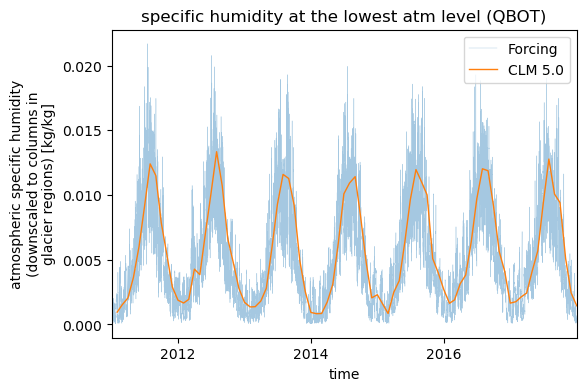

In [5]:
plot_forcing('QBOT', 'QBOT')

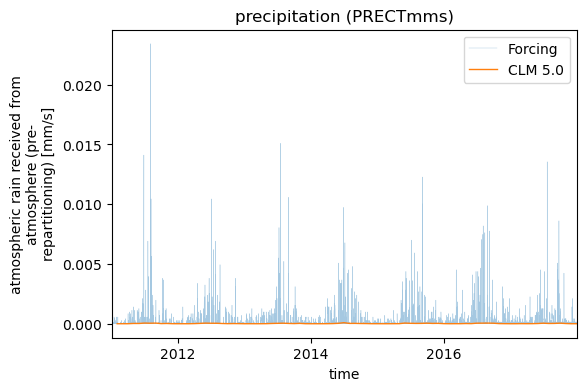

In [6]:
plot_forcing('PRECTmms', 'RAIN_FROM_ATM')

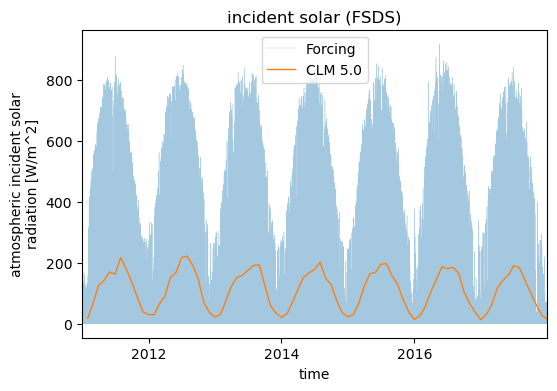

In [7]:
plot_forcing('FSDS', 'FSDS')

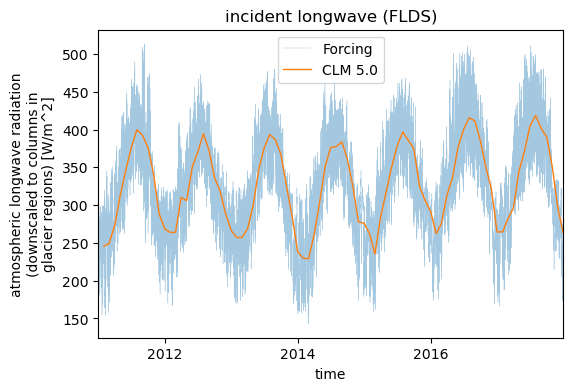

In [8]:
plot_forcing('FLDS', 'FLDS')

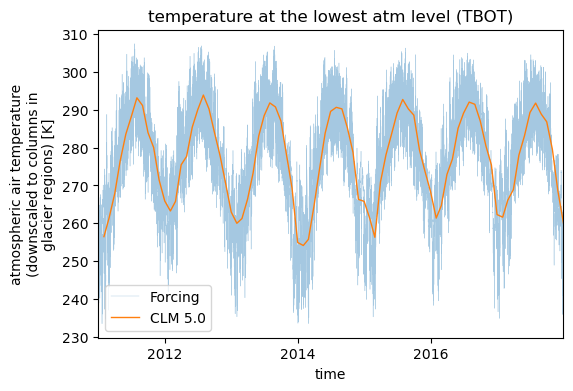

In [9]:
plot_forcing('TBOT', 'TBOT')

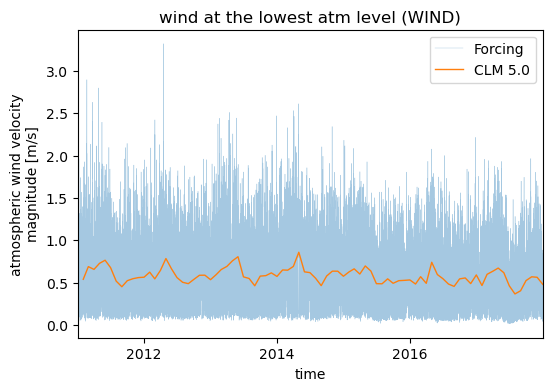

In [10]:
plot_forcing('WIND', 'WIND')

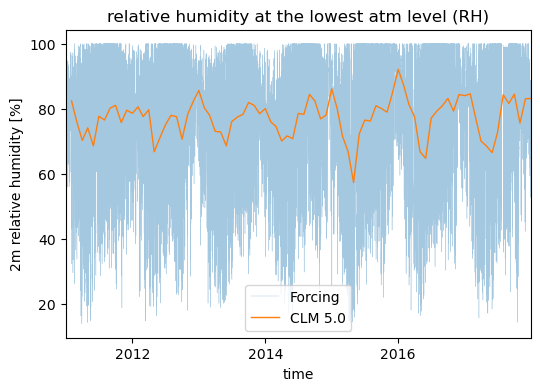

In [11]:
plot_forcing('RH', 'RH2M')

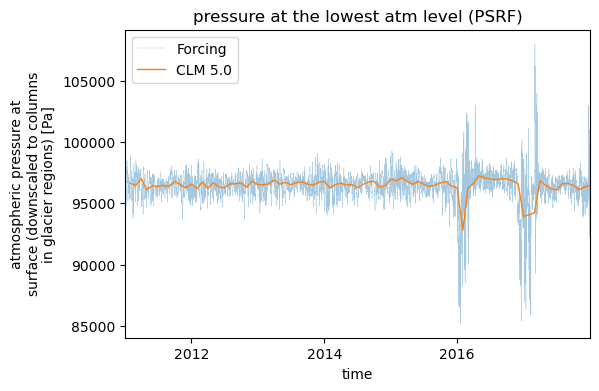

In [12]:
plot_forcing('PSRF', 'PBOT')

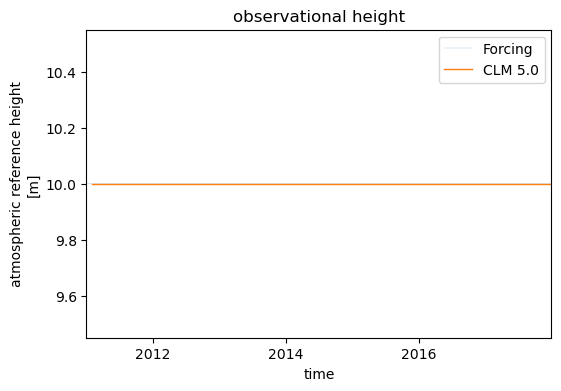

In [13]:
plot_forcing('ZBOT', 'ZBOT')